In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")

In [2]:
# Loading dataset
data = pd.read_csv("Wine.csv")

In [3]:
# Displaying dataset
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Checking shape
data.shape

(178, 13)

Our dataset have 178 rows and 13 columns

In [5]:
# Checking data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Data Preprocessing 

In [6]:
# Checking for null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There are no null values in our dataset

In [7]:
# Checking statistical summary of data
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
# Let's standardize our dataset
from sklearn.preprocessing import StandardScaler
# Create an instance of the class
scaler = StandardScaler()
# Use the fit transform method to perform the transformation on train data
data.loc[:,:] = scaler.fit_transform(data)
print(data)

      Alcohol  Malic_Acid       Ash  ...       Hue     OD280   Proline
0    1.518613   -0.562250  0.232053  ...  0.362177  1.847920  1.013009
1    0.246290   -0.499413 -0.827996  ...  0.406051  1.113449  0.965242
2    0.196879    0.021231  1.109334  ...  0.318304  0.788587  1.395148
3    1.691550   -0.346811  0.487926  ... -0.427544  1.184071  2.334574
4    0.295700    0.227694  1.840403  ...  0.362177  0.449601 -0.037874
..        ...         ...       ...  ...       ...       ...       ...
173  0.876275    2.974543  0.305159  ... -1.392758 -1.231206 -0.021952
174  0.493343    1.412609  0.414820  ... -1.129518 -1.485445  0.009893
175  0.332758    1.744744 -0.389355  ... -1.612125 -1.485445  0.280575
176  0.209232    0.227694  0.012732  ... -1.568252 -1.400699  0.296498
177  1.395086    1.583165  1.365208  ... -1.524378 -1.428948 -0.595160

[178 rows x 13 columns]


### PCA

In [9]:
# Since we have about 13 columns let's do a principal component analysis (PCA) to reduce the columns and extract the key features.

In [10]:
# The loading vectors
from sklearn.decomposition import PCA
pca_loadings = pd.DataFrame(PCA().fit(data).components_.T, 
columns=['V1', 'V2', 'V3', 'V4','V5','V6','V7','V8','V9','V10','V11','V12','V13'])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
1,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
2,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
3,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
4,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
5,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
6,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
7,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
8,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917
9,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993


In [11]:
# Fit the PCA model and transform data to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(data), 
          columns=['V1', 'V2', 'V3', 'V4','V5','V6','V7','V8','V9','V10','V11','V12','V13'],)
df_plot

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [12]:
# Checking the correlation between the components
df_plot.corr().round()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
V1,1.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0
V2,-0.0,1.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
V3,0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
V4,-0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
V5,0.0,-0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
V6,-0.0,-0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
V7,0.0,0.0,-0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
V8,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0
V9,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0
V10,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,1.0,-0.0,-0.0,0.0


In [13]:
# Checking the explained variance
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

We observe that the first component explains around 36% of the variability of the data, the second one: 19%, the third: 11% and so on. And the last component explains only 0.8% of the information.

In [14]:
# Standard deviation of the 13 principal components
np.sqrt(pca.explained_variance_)

array([2.17541651, 1.58463905, 1.20591951, 0.96133546, 0.92630917,
       0.8032946 , 0.74440679, 0.59200192, 0.53899168, 0.50231465,
       0.47651262, 0.41197541, 0.32243138])

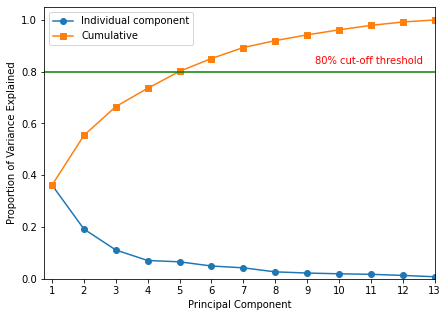

In [15]:
# Let's plot the line chart that shows the cumulative explained variance against the number of components chosen.

plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.legend(loc=2);
plt.axhline(y=0.80, color='green', linestyle='-')
plt.text(9.25, 0.83, '80% cut-off threshold', color = 'red', fontsize=10)
plt.show()

 The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 5 components.

In [16]:
# performing PCA with the chosen number of components
pca = PCA(n_components = 5)
pca.fit(data)

PCA(n_components=5)

In [17]:
# We need only the calculated resulting components scores for the elements in our data set:
scores_pca = pca.transform(data)
scores_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01,  6.93042841e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01, -2.57654635e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01,
         7.24902309e-01, -2.51033118e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01,
         5.67983308e-01, -3.11841591e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01,  2.98457503e-01],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01, -6.32018734e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02, -1.02776191e+00],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00,  7.69034938e-02],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00,
         5.62703612e-02, -8.92256977e-01],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01,
         3.49381568e-01

# Modelling

## 1) KMeans Clustering

1854.9554543633787
1201.157500365356
825.0208377375342
728.2957772708617
658.8177922221255
602.1522638667591
562.1724398864936
524.184389508789
483.8272047650081
449.92907548596446


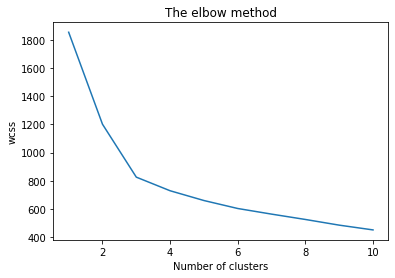

In [18]:
# Finding the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()  

In [19]:
# We can see a significant bend at n=3.
# So we can choose the optinum number of clusters as 3 and build our model
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(scores_pca)
labels = model_kmeans.predict(scores_pca)
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### Analysing the Results of PCA and K-Means Clustering

In [20]:
# We create a new dataframe with orginal features and add the pca scores and assigned clusters
newdf = pd.concat([data.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
newdf.columns.values[-5:] = ['component1', 'component2', 'component3', 'component4', 'component5']
# The last column we add contains clustering labels
newdf['Cluster label'] = model_kmeans.labels_
newdf.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,component1,component2,component3,component4,component5,Cluster label
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463,-0.165739,-0.215631,0.693043,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393,-2.026457,-0.291358,-0.257655,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151,0.982819,0.724902,-0.251033,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372,-0.176192,0.567983,-0.311842,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831,2.026688,-0.409766,0.298458,2


In [21]:
# we should add the names of the clusters to the labels.
# We create a new column named ‘Segment’ and map the 3 clusters directly inside it.
newdf['Segment'] = newdf['Cluster label'].map({0:'first',
                                         1:'second',
                                         2:'third'})

### Diagramatic Repesentation

In [ ]:
#Let’s finish off by visualizing our clusters on a 2D plane.
#It's a 2D visualization, so we need to choose two components and use them as axes. 
#The point of PCA was to determine the most important components. 
# This way, we can be absolutely sure that the first two components explain more variance than the third one.
# So, let’s visualize the segments with respect to the first two components.

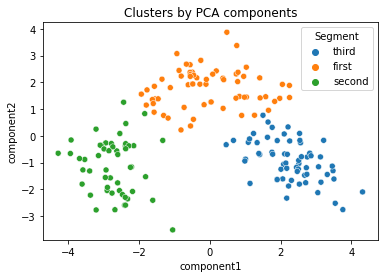

In [22]:
# Plotting the data by PCA components
x = newdf['component1']
y = newdf['component2']
sns.scatterplot(x,y, hue = newdf['Segment'])
plt.title('Clusters by PCA components')
plt.show()

There is some overlap between the red and blue segments. But, as a whole, all 3 segments are clearly separated. 
The spots where the two overlap are ultimately determined by the other components, which are not available on this graph.
That’s the reason why even a two-dimensional plot is enough to see the separation.

## 2) Hierarchial Clustering

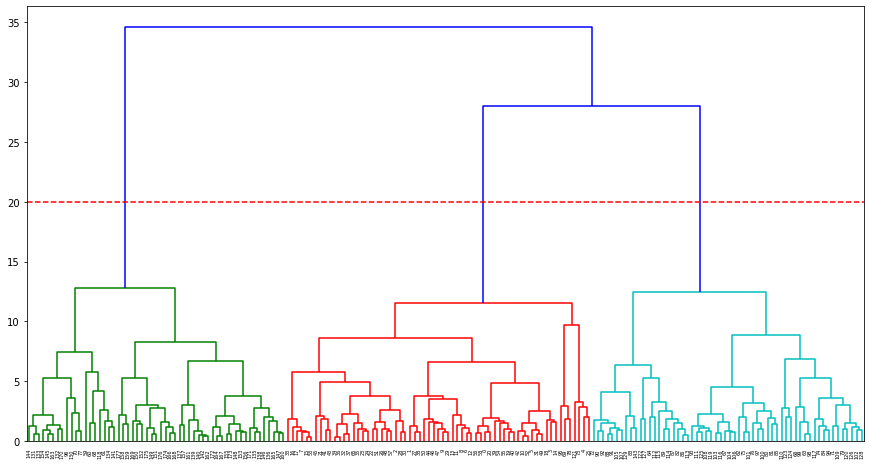

In [23]:
# Finding the optimum number of k value by plotting a dendrogram and with that we can create a model
# Plotting dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(scores_pca, method = 'ward')
plt.figure(figsize = (15,8))
dendrogram(linked, orientation = 'top',distance_sort='ascending',show_leaf_counts = True)
plt.hlines(20, 0, 5000, linestyles= 'dashed', colors='r')
plt.show()

In [24]:
# From the dendrogram it is clear that our optimum k value is 3.

In [25]:
# Let's build the model
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
labels = cluster.fit_predict(scores_pca)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2,
       1, 1, 0, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
# Here also we have 3 clusters 0,1, and 2

In [26]:
# Converting our numpy array to a dataframe
df = pd.DataFrame(scores_pca)
df

,0,1,2,3,4
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164
174,-2.601956,-1.757229,0.207581,0.349496,0.255063
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955


In [27]:
df.rename(columns = {0:'pc1',1:'pc2',2:'pc3', 3:'pc4', 4:'pc5'}, inplace = True)
df.columns

Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5'], dtype='object')

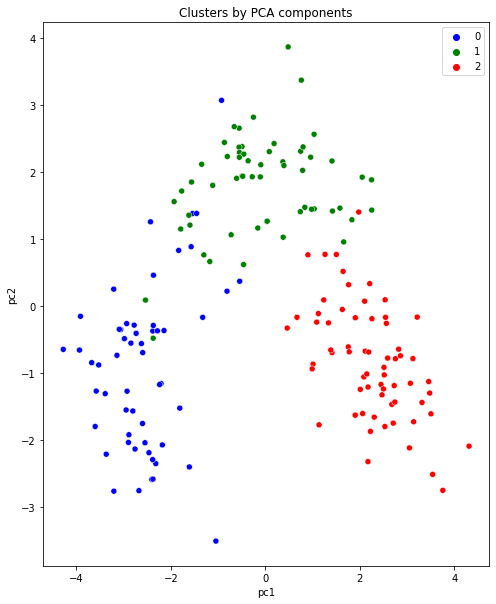

In [28]:
# Let's visualise our clusters
x = df['pc1']
y = df['pc2']
plt.figure(figsize=(8, 10)) 
sns.scatterplot(x,y, hue = cluster.labels_, palette=['b','g','r'])
plt.title('Clusters by PCA components')
plt.show()

We can see our clusters clearly.The spots where the two overlap are ultimately determined by the other components, which are not available on this graph.
That’s the reason why even a two-dimensional plot is enough to see the separation.